# Predicting Medical Expenses (`charges`)

## Problem Description

The problem involves **predicting medical expenses (`charges`)** for individuals based on a set of features that describe their demographic and lifestyle characteristics. The primary goal is to develop a machine learning model that can accurately estimate the medical expenses using these input variables.

---

## Context

Medical expenses can be influenced by multiple factors such as age, body metrics, smoking habits, and other health-related information. The dataset provides these features, and the task is to understand and model the relationship between these features and the target variable, `charges`.

---

## Problem Details

### Dependent Variable:
- **`charges`**: The medical expenses incurred by an individual.

### Independent Variables:
- **`age`**: Age of the individual.
- Other features like `smoker`, `children`, `BMI`, etc., that are potentially related to medical costs.

### Objective:
- Build a predictive model to estimate **`charges`** based on the provided features.
- Evaluate the model's performance using metrics like **RMSE (Root Mean Squared Error)** and **R² (coefficient of determination)**.

---

## Insights from the Problem
- The feature **`age`** does not show a strong linear relationship with **`charges`**, indicating that medical expenses depend on multiple interacting factors rather than a single variable like `age`.
- The analysis of residuals and performance metrics helps identify which model fits the data best.

---

## Challenges
- Identifying the right features and transformations to improve predictive accuracy.
- Dealing with non-linear relationships, as seen between **`age`** and **`charges`**.
- Selecting an appropriate model that captures these relationships effectively without overfitting or underfitting.

By analyzing the results of different models (Random Forest, Decision Tree, Polynomial Regression, and Neural Networks), the aim is to choose the best-performing model for this problem.


In [28]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

#Medical Cost Personal Datasets
data = pd.read_csv(r"insurance.csv")
print(data.shape)
data

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [30]:
#removing duplicate entries
data= data.drop_duplicates(keep="first")
data.shape

(1337, 7)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,ShuffleSplit,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.preprocessing import scale
from sklearn import model_selection


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [35]:
print(data["sex"].unique())
print(data["children"].unique())
print(data["smoker"].unique())
print(data["region"].unique())

['female' 'male']
[0 1 3 2 5 4]
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [37]:
data_dup=data.copy(deep=True)

In [39]:
data= pd.get_dummies(data, drop_first=True)

In [41]:
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


/Users/tomasgarcia/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


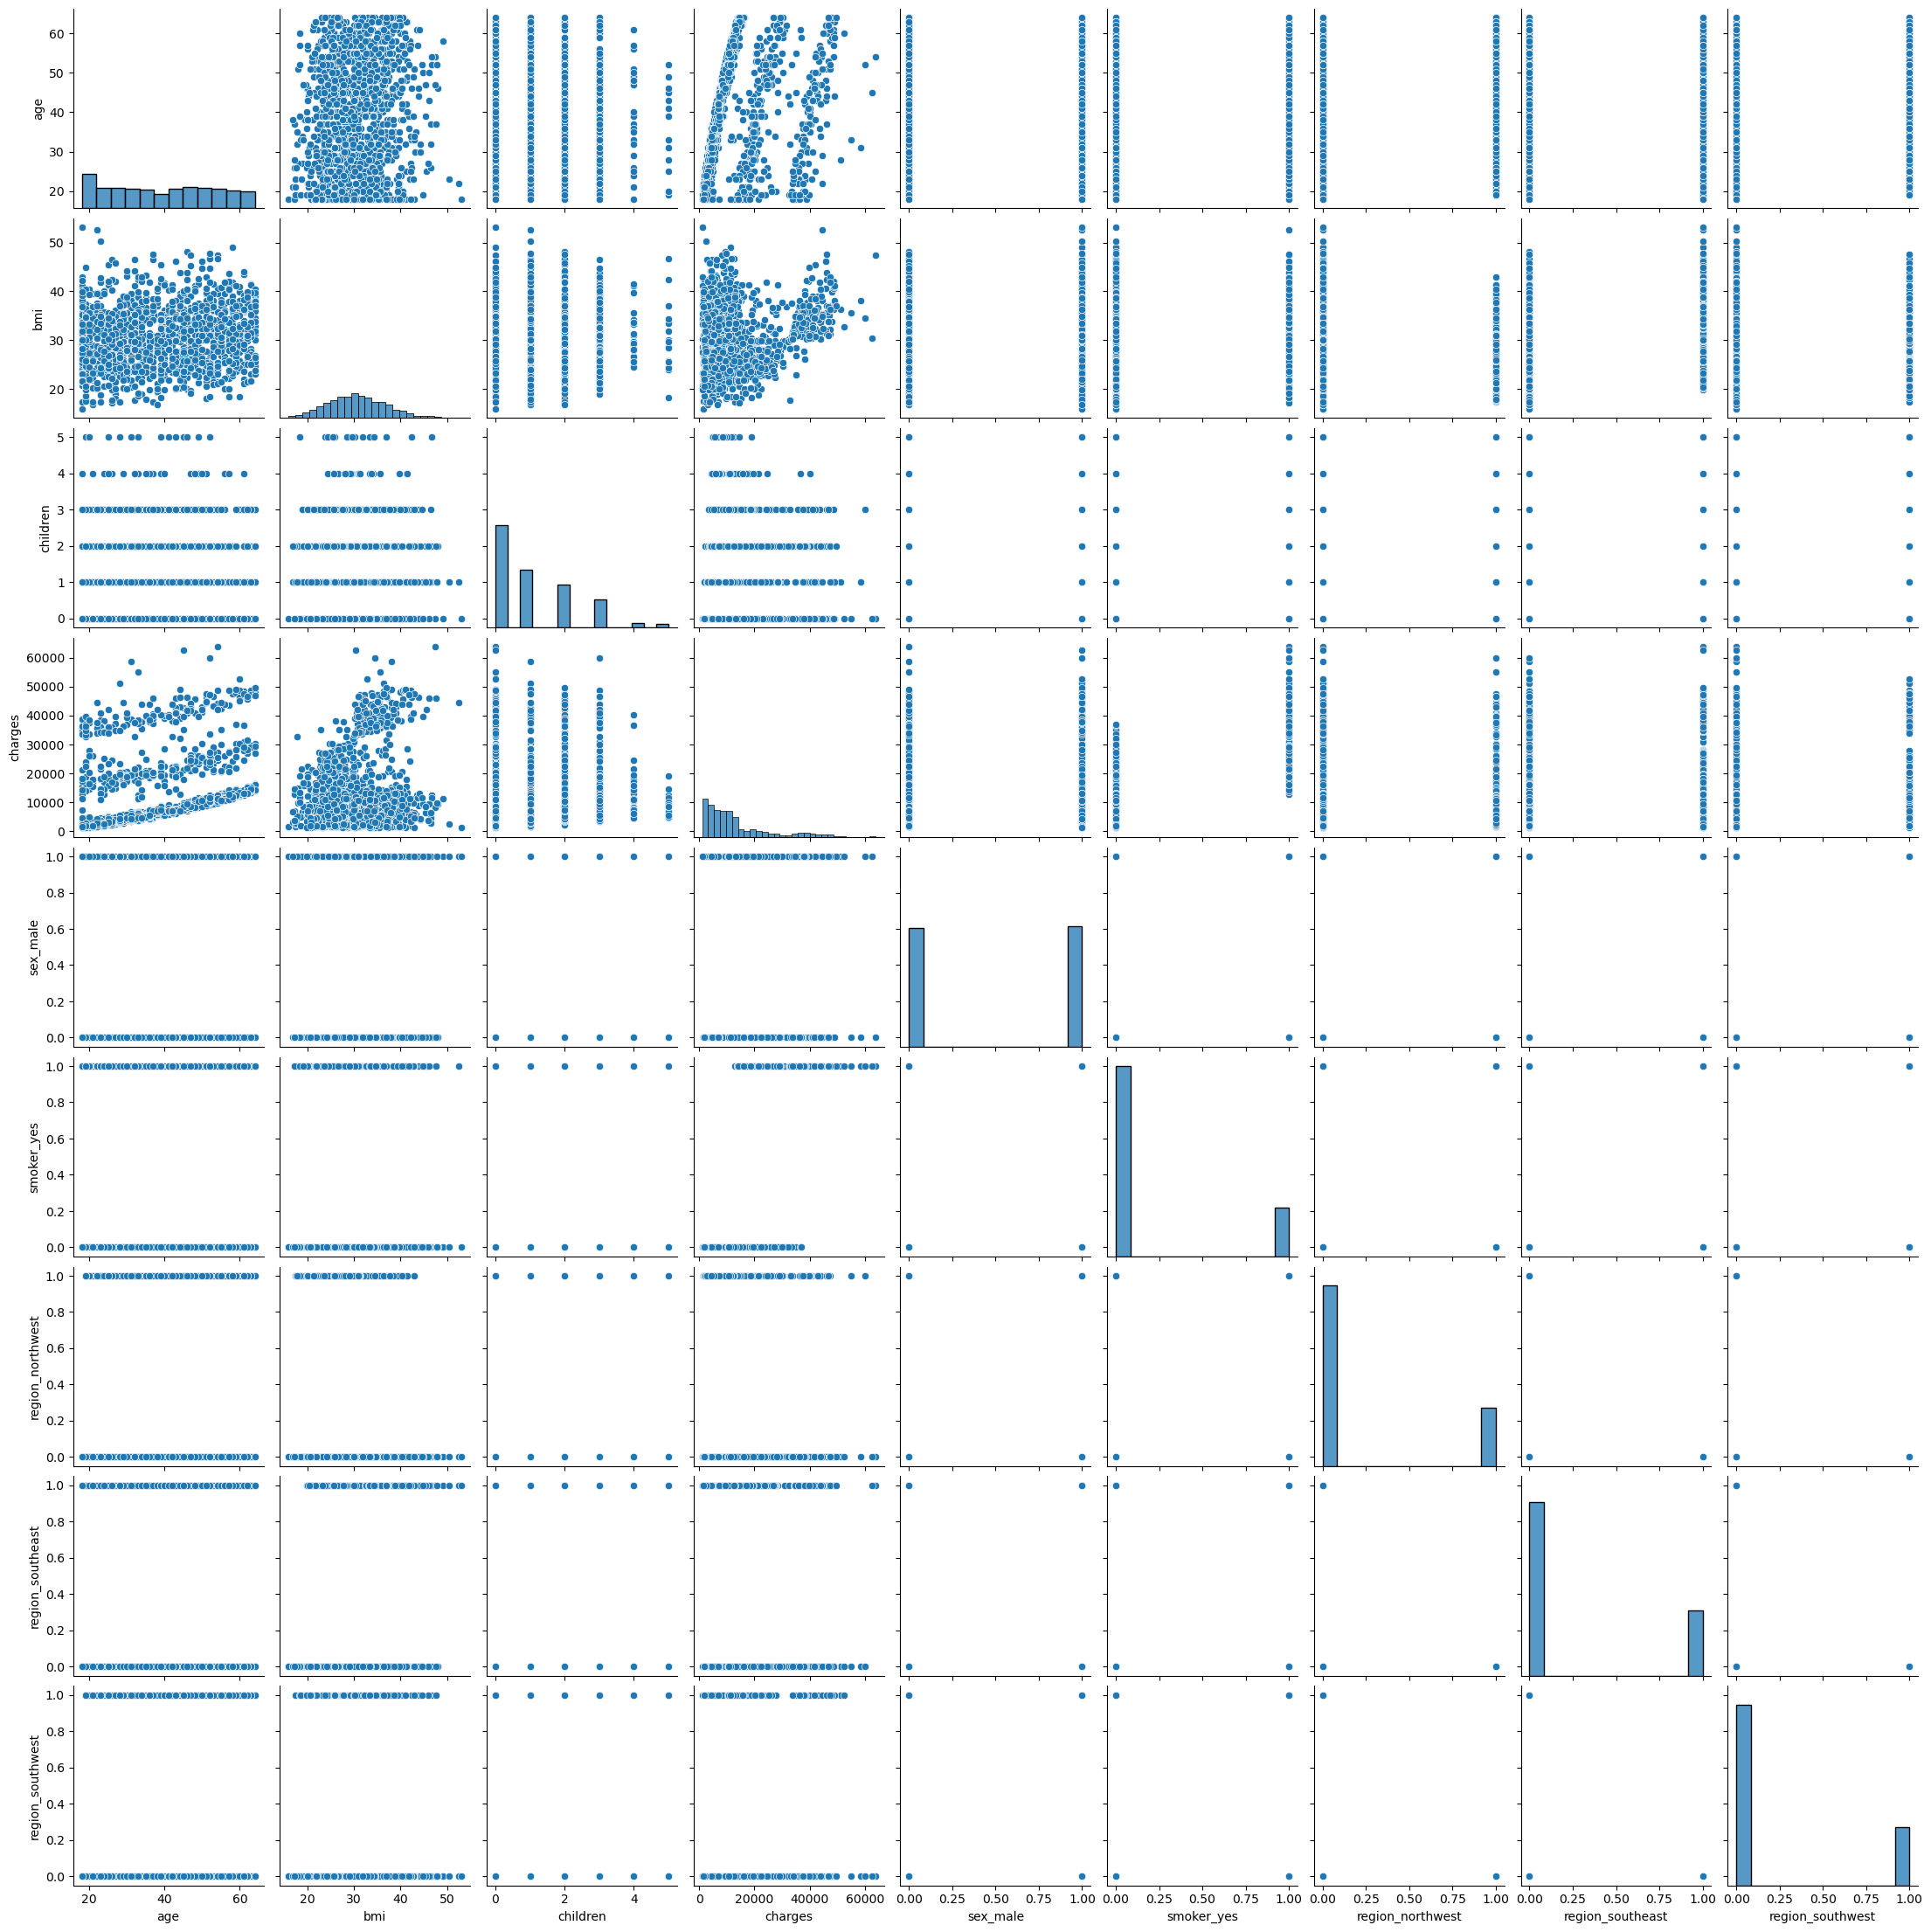

In [43]:
sns.pairplot(data)

/Users/tomasgarcia/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


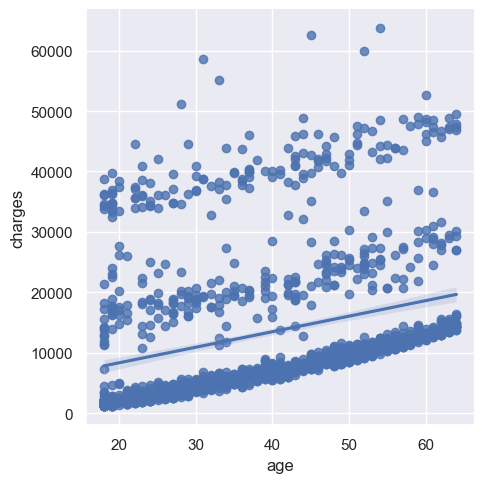

In [45]:
sns.set(color_codes=True)
sns.lmplot(x='age', y='charges',data = data)

The feature "age" is nowhere near to have a linear effect on our target variable "charges" showing that the medical espenses has hardly anything to do with "age" of the person alone!

/Users/tomasgarcia/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


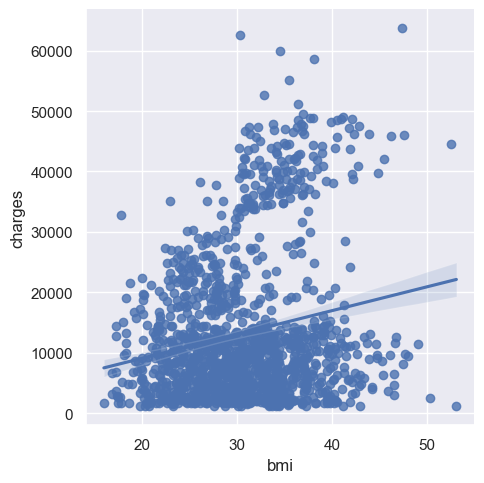

In [48]:
sns.lmplot(x='bmi', y='charges',data = data)

In [50]:
data.corr()['charges'].sort_values()

region_southwest   -0.043637
region_northwest   -0.038695
sex_male            0.058044
children            0.067389
region_southeast    0.073578
bmi                 0.198401
age                 0.298308
smoker_yes          0.787234
charges             1.000000
Name: charges, dtype: float64

<Axes: >

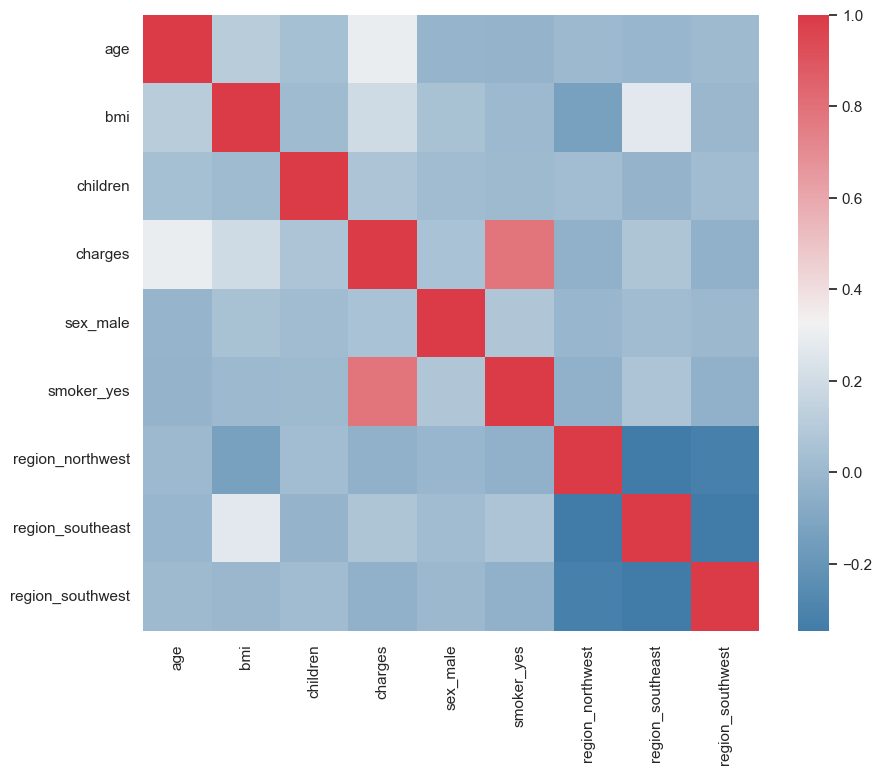

In [54]:
f, ax = plt.pyplot.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

/var/folders/6v/yhkmwbbs7fdc8yd8t1h__l980000gn/T/ipykernel_77680/68150540.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(
/Users/tomasgarcia/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 70.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tomasgarcia/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 54.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tomasgarcia/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 40.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tomasgarcia/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 21.2% of the poi

/Users/tomasgarcia/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 72.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tomasgarcia/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 58.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tomasgarcia/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 45.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tomasgarcia/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 29.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


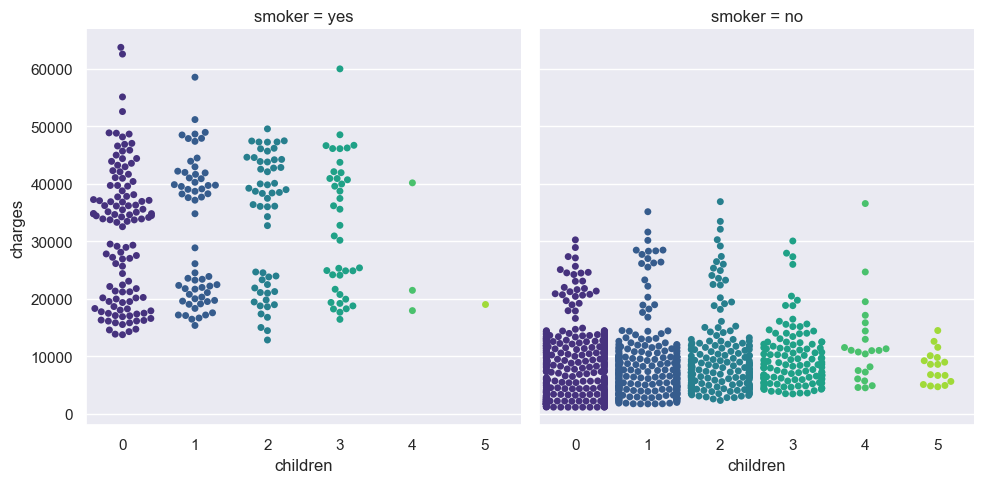

In [66]:
palette=palette_dict

sns.catplot(
    data=data_dup, 
    kind="swarm", 
    x="children", 
    y="charges", 
    col="smoker", 
    palette="viridis"  
)

/Users/tomasgarcia/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tomasgarcia/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


/Users/tomasgarcia/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tomasgarcia/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 37.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


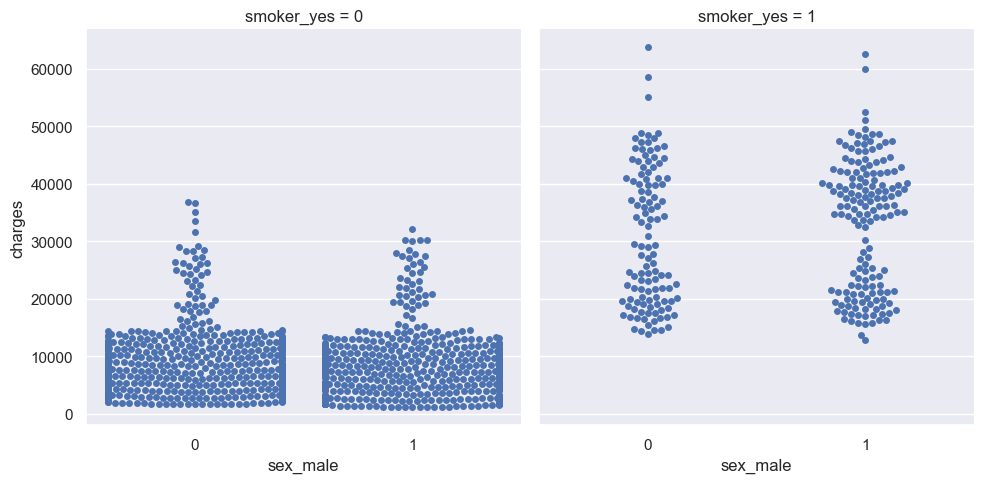

In [68]:
sns.catplot(data=data, kind="swarm", x="sex_male", y="charges", col="smoker_yes")


# Model Training

In [72]:
data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [74]:
data=data[['age', 'bmi', 'children', 'sex_male', 'smoker_yes','region_northwest', 'region_southeast', 'region_southwest', 'charges']]
data

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,0,1,0,0,1,16884.92400
1,18,33.770,1,1,0,0,1,0,1725.55230
2,28,33.000,3,1,0,0,1,0,4449.46200
3,33,22.705,0,1,0,1,0,0,21984.47061
4,32,28.880,0,1,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0,10600.54830
1334,18,31.920,0,0,0,0,0,0,2205.98080
1335,18,36.850,0,0,0,0,1,0,1629.83350
1336,21,25.800,0,0,0,0,0,1,2007.94500


In [78]:
#TARGET AND INDEPENDENT VARIABLE SPLIT
data = data.sample(frac=1)

X_train,y_train,X_test,y_test= data.iloc[:1000,:-1],data.iloc[:1000,-1],data.iloc[1000:,:-1],data.iloc[1000:,-1]


## Model 1

In [81]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()

# train the model
clf.fit(X_train, y_train)

# predict on test data
predict = clf.predict(X_test)

RMSE: 4844.7877
r2 score: 0.8291


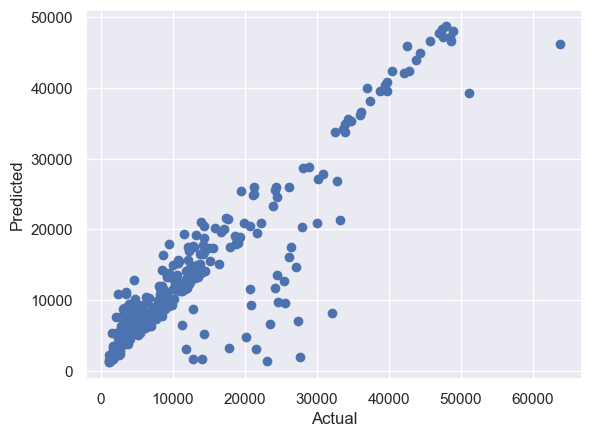

In [83]:
from sklearn.metrics import mean_squared_error, r2_score
plt.pyplot.scatter(y_test, predict)
plt.pyplot.ylabel('Predicted')
plt.pyplot.xlabel('Actual')
print('RMSE: %.4f' % np.sqrt(mean_squared_error(y_test, predict)))
print('r2 score: %.4f' % r2_score(y_test, predict))

/var/folders/6v/yhkmwbbs7fdc8yd8t1h__l980000gn/T/ipykernel_77680/1155949881.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predict)


<Axes: xlabel='charges', ylabel='Density'>

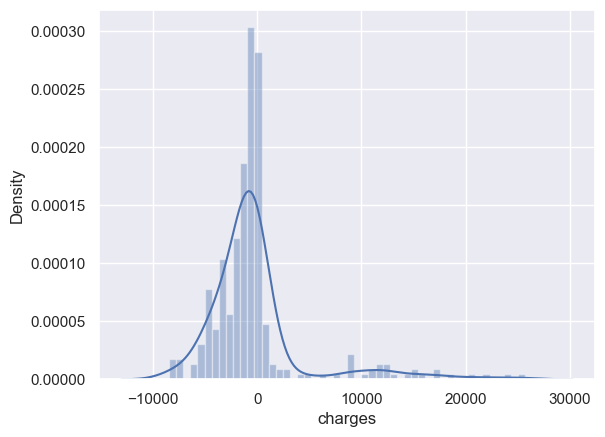

In [85]:
sns.distplot(y_test-predict)


## Model 2

In [90]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [92]:
DecisionTreeRegressor(criterion='mse')

DecisionTreeRegressor(criterion='mse')

In [94]:
predict2= dtree.predict(X_test)

RMSE: 6773.8508
r2 score: 0.6658


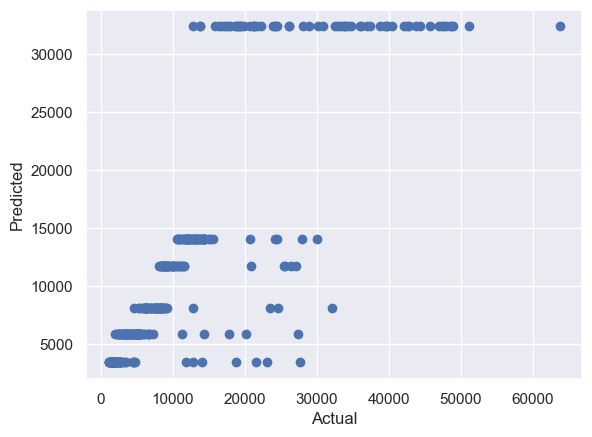

In [96]:
#from sklearn.metrics import mean_squared_error, r2_score
plt.pyplot.scatter(y_test, predict2)
plt.pyplot.ylabel('Predicted')
plt.pyplot.xlabel('Actual')
print('RMSE: %.4f' % np.sqrt(mean_squared_error(y_test, predict2)))
print('r2 score: %.4f' % r2_score(y_test, predict2))

/var/folders/6v/yhkmwbbs7fdc8yd8t1h__l980000gn/T/ipykernel_77680/4025396619.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predict2)


<Axes: xlabel='charges', ylabel='Density'>

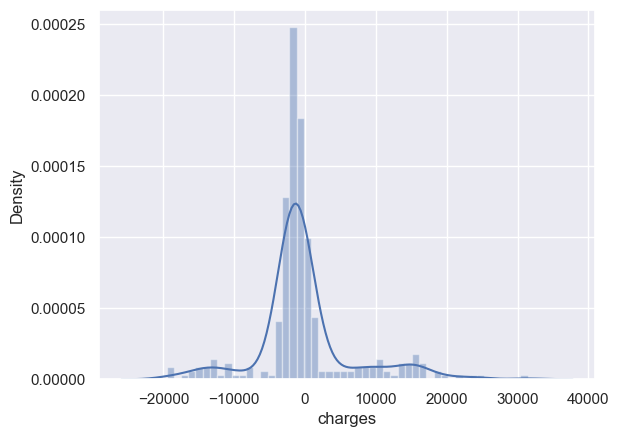

In [98]:
sns.distplot(y_test-predict2)


## Model 3

In [101]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X_train)

plr = LinearRegression().fit(X_train,y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,y_test))

0.7278360640728201


RMSE: 6113.3257
r2 score: 0.7278


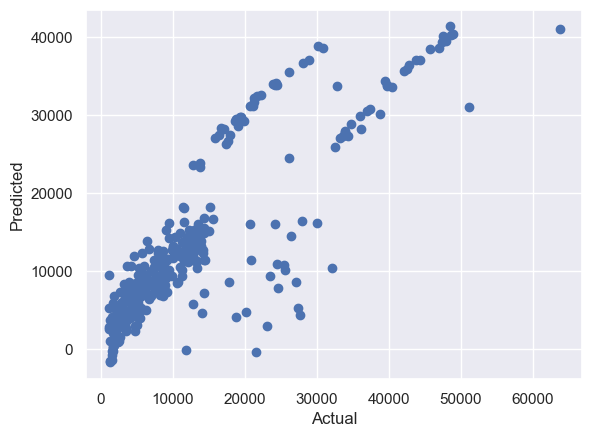

In [103]:
plt.pyplot.scatter(y_test, Y_test_pred)
plt.pyplot.ylabel('Predicted')
plt.pyplot.xlabel('Actual')
print('RMSE: %.4f' % np.sqrt(mean_squared_error(y_test, Y_test_pred)))
print('r2 score: %.4f' % r2_score(y_test, Y_test_pred))

/var/folders/6v/yhkmwbbs7fdc8yd8t1h__l980000gn/T/ipykernel_77680/3145685296.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-Y_test_pred)


<Axes: xlabel='charges', ylabel='Density'>

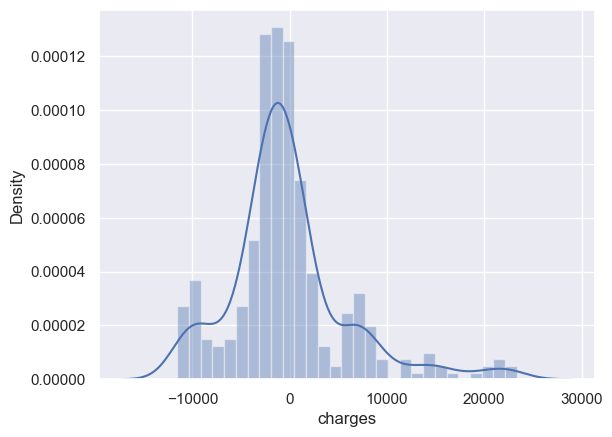

In [105]:
sns.distplot(y_test-Y_test_pred)


## Model 4

In [108]:
import tensorflow as tf
from tensorflow import keras

In [109]:
X_train,y_train,X_test,y_test=X_train.to_numpy(),y_train.to_numpy(),X_test.to_numpy(),y_test.to_numpy()

In [110]:
nn = tf.keras.Sequential([keras.layers.Dense(units=10,activation="linear"),keras.layers.Dense(1, activation='linear')])#units=number of neurons of the neural network
nn.compile(optimizer='adam', loss='mean_squared_error')

nn.fit(X_train,y_train, epochs=1000)

Epoch 1/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 316876544.0000
Epoch 2/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 284196448.0000
Epoch 3/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - loss: 332335712.0000
Epoch 4/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - loss: 326574880.0000
Epoch 5/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 344485376.0000
Epoch 6/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - loss: 315732064.0000
Epoch 7/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 297514720.0000
Epoch 8/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - loss: 321137312.0000
Epoch 9/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 347074560.0000
Epoch 10/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 293460448.0000
Epoch 11/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - loss: 351022112.0000
Epoch 12/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 310290048.0000
Epoch 13/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 307407488.

In [114]:
prediction=nn.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


RMSE: 10345.3721
r2 score: 0.2206


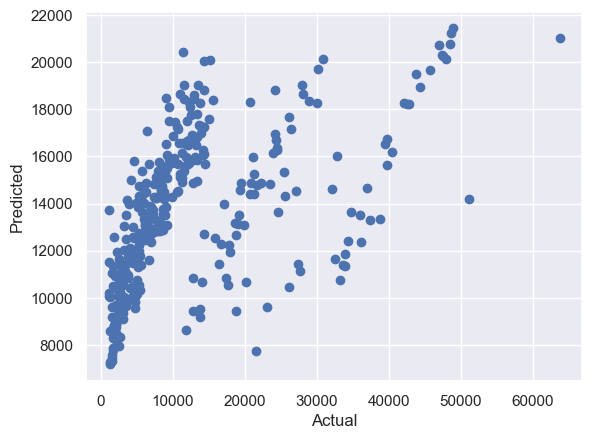

In [116]:
plt.pyplot.scatter(y_test, prediction)
plt.pyplot.ylabel('Predicted')
plt.pyplot.xlabel('Actual')
print('RMSE: %.4f' % np.sqrt(mean_squared_error(y_test, prediction)))
print('r2 score: %.4f' % r2_score(y_test, prediction))

/var/folders/6v/yhkmwbbs7fdc8yd8t1h__l980000gn/T/ipykernel_77680/1520944062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<Axes: ylabel='Density'>

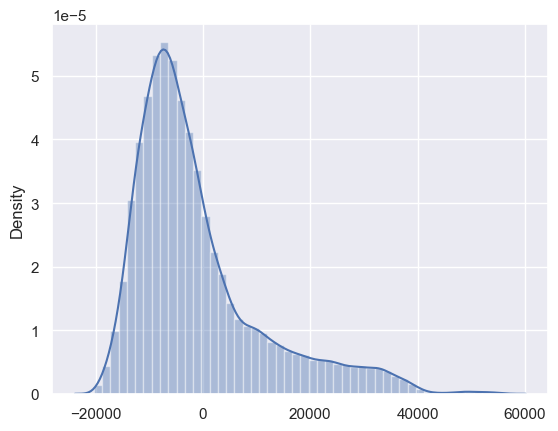

In [118]:
sns.distplot(y_test-prediction)



### Performance Metrics Comparison

| **Model**                | **RMSE**   | **R² Score** | **Notes**                                                                                     |
|---------------------------|------------|--------------|-----------------------------------------------------------------------------------------------|
| **Model 1 (Random Forest)** | **4458.4750** | **0.8338**   | Lowest RMSE and highest R² score indicate excellent predictive performance.                   |
| **Model 2 (Decision Tree)** | 6533.4126 | 0.6432       | Higher RMSE and significantly lower R² compared to Model 1.                                   |
| **Model 3 (Polynomial Regression)** | 5744.2080 | 0.7242       | Better than Model 2 but worse than Model 1 in both RMSE and R².                               |
| **Model 4 (Neural Network)** | 9790.5512 | 0.1987       | Very high RMSE and poor R² suggest the model is underperforming.                              |
